In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [134]:
df=pd.read_csv("titanic_train.csv")
df_test=pd.read_csv("test.csv")
df_test.shape

(418, 11)

In [135]:
df.shape #see test and train data set have different rows so thats y we cant upload our predictions from train even though
         #we have y that can be uploaded but no due to row incosistency we have to upload create a new test dataframe 
         #different model for test and then predict for it.

(891, 12)

In [113]:
df=pd.get_dummies(df,columns=["Sex","Embarked","Pclass"]).drop('Cabin', axis=1).fillna(df['Age'].mean())

df_test=pd.get_dummies(df_test,columns=["Sex","Embarked","Pclass"]).drop('Cabin', axis=1).fillna(df_test['Age'].mean())

In [79]:
x=df[["Fare","Sex_female","Embarked_S","Embarked_Q","Pclass_3","Pclass_2","SibSp","Parch"]]

In [80]:
y=df["Survived"]

In [114]:
df_test1=df_test[["Fare","Sex_female","Embarked_S","Embarked_Q","Pclass_3","Pclass_2","SibSp","Parch"]]

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [83]:
model = DecisionTreeClassifier(max_depth=3) #max depth says till how many subbranch or nodes it should go

DecisionTreeClassifier(max_depth=3)

In [138]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=19)

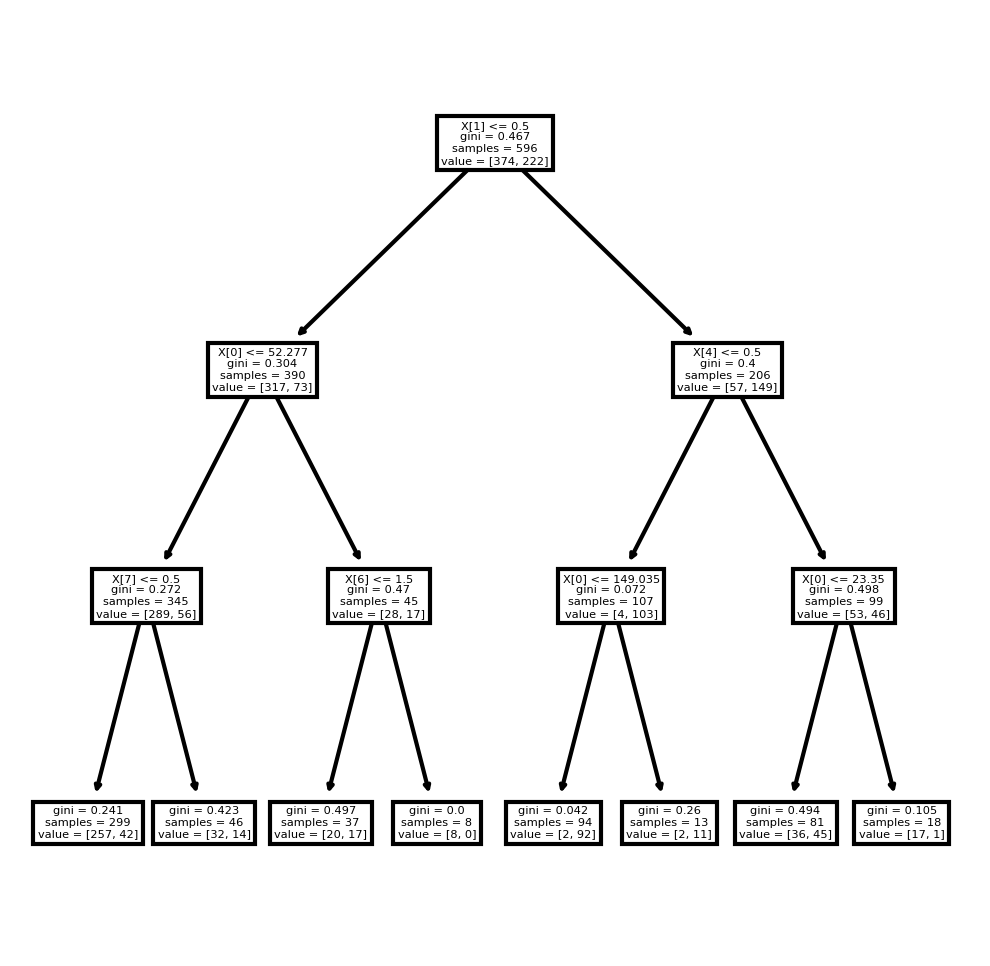

In [84]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300) #this just enlarges the image
tree.plot_tree(model);#this will plot

In [136]:
preds = model.predict(x_test)

In [137]:
preds

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [140]:
preds1=model.predict(df_test1) #you dont have to fit model for test data set it will predict directly for test since the whole data set is x

In [144]:
#also u cannot calculate score for test dataset

In [119]:
model.score(x_test,y_test)

0.7694915254237288

In [120]:
model.score(x_train,y_train)

0.9261744966442953

# For kaggle upload

In [125]:
sub=df_test[["PassengerId"]]
sub.shape

(418, 1)

In [127]:
preds.shape

(418,)

In [129]:
sub["Survived"]=preds

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_21376/4197549325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Survived"]=preds


In [132]:
sub.to_csv("Kaggle.csv", index=False) # to create the csv file

# Random Forest Tree

In [90]:
for i in range(1,20): #here we declare range of rows 
    model = RandomForestClassifier(n_estimators=i) #estimators is number of trees
    model.fit(x_train,y_train)
    preds1 = model.predict(x_test)
    a=model.score(x_test,y_test)
    print(a)

0.7491525423728813
0.7322033898305085
0.7559322033898305
0.7559322033898305
0.7593220338983051
0.7593220338983051
0.7830508474576271
0.7661016949152543
0.7830508474576271
0.7898305084745763
0.7661016949152543
0.7627118644067796
0.7728813559322034
0.7559322033898305
0.7694915254237288
0.7661016949152543
0.7661016949152543
0.7593220338983051
0.7694915254237288


In [22]:
for i in range(100,1000):
    model = RandomForestClassifier(n_estimators=i)#u can write RandomTreeClassifier to see the change in score instead of descion tree
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(x_train,y_train)
    preds = model.predict(x_test,cv=kfold)
    a=model.score(x_train,y_train)
    print(a)

SyntaxError: invalid syntax (Temp/ipykernel_17416/3018872130.py, line 7)

# to calculate the precision

In [128]:
from sklearn import metrics
print(metrics.classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       176
           1       0.72      0.72      0.72       119

    accuracy                           0.77       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295

